In [1]:
import pandas as pd

df = pd.read_csv("ALLFLOWMETER_HIKARI2021.csv")  
df.head()  


,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,1,1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,2,2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,3,3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,4,4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1


In [2]:

print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1])


if 'Label' in df.columns:  
    print(df['Label'].value_counts())
else:
    print("No label column found.")


Number of samples: 555278
Number of features: 88
0    517582
1     37696
Name: Label, dtype: int64


In [3]:
print(df.columns)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'uid', 'originh', 'originp', 'responh',
       'responp', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot',
       'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec',
       'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio',
       'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max',
       'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
       'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count',
       'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count',
       'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count',
       'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot',
       'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max'

In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 88 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              555278 non-null  int64  
 1   Unnamed: 0                555278 non-null  int64  
 2   uid                       555278 non-null  object 
 3   originh                   555278 non-null  object 
 4   originp                   555278 non-null  int64  
 5   responh                   555278 non-null  object 
 6   responp                   555278 non-null  int64  
 7   flow_duration             555278 non-null  float64
 8   fwd_pkts_tot              555278 non-null  int64  
 9   bwd_pkts_tot              555278 non-null  int64  
 10  fwd_data_pkts_tot         555278 non-null  int64  
 11  bwd_data_pkts_tot         555278 non-null  int64  
 12  fwd_pkts_per_sec          555278 non-null  float64
 13  bwd_pkts_per_sec          555278 non-null  f

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("ALLFLOWMETER_HIKARI2021.csv")

# Drop irrelevant or non-numeric columns
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'uid', 'originh', 'originp', 'responh', 'responp', 'traffic_category'], inplace=True)

# Define features (X) and label (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Handle categorical features (if any)
X = pd.get_dummies(X)

# Now split the dataset just once
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 388694 Test size: 166584


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- Random Forest ---
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=None,         # Let trees grow fully
    random_state=42
)
print("\n Random Forest Hyperparameters:")
print(rf_model.get_params())

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("\n Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))




 Random Forest Hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

 Random Forest Results:
Accuracy: 0.8895632233587859
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94    155275
           1       0.14      0.12      0.13     11309

    accuracy                           0.89    166584
   macro avg       0.54      0.53      0.53    166584
weighted avg       0.88      0.89      0.89    166584



In [7]:
# --- Decision Tree ---
dt_model = DecisionTreeClassifier(
    max_depth=10,             # Limit depth of the tree
    min_samples_split=5,      # Min samples to split an internal node
    min_samples_leaf=4,       # Min samples required at a leaf node
    random_state=42
)
print("\n Decision Tree Hyperparameters:")
print(dt_model.get_params())

dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("\n Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))




 Decision Tree Hyperparameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}

 Decision Tree Results:
Accuracy: 0.9325145272054939
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96    155275
           1       0.51      0.28      0.36     11309

    accuracy                           0.93    166584
   macro avg       0.73      0.63      0.66    166584
weighted avg       0.92      0.93      0.92    166584



In [8]:
# --- K-Nearest Neighbors ---
knn_model = KNeighborsClassifier(
    n_neighbors=5,          # Number of neighbors to use
    weights='uniform',      # All points in each neighborhood are weighted equally
    algorithm='auto'        # Let sklearn choose the best algorithm
)
print("\n KNN Hyperparameters:")
print(knn_model.get_params())

knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
print("\n KNN Results:")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("Classification Report:\n", classification_report(y_test, knn_preds))



 KNN Hyperparameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


C:\Users\shrut\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



 KNN Results:
Accuracy: 0.9119003025500648
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95    155275
           1       0.28      0.18      0.22     11309

    accuracy                           0.91    166584
   macro avg       0.61      0.57      0.59    166584
weighted avg       0.90      0.91      0.90    166584



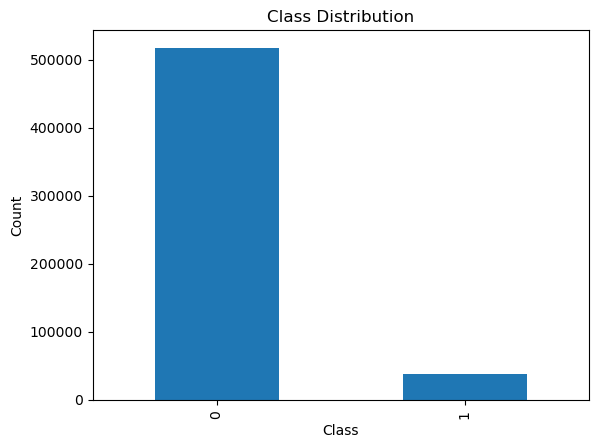

In [9]:
import matplotlib.pyplot as plt
df['Label'].value_counts().plot(kind='bar', title="Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


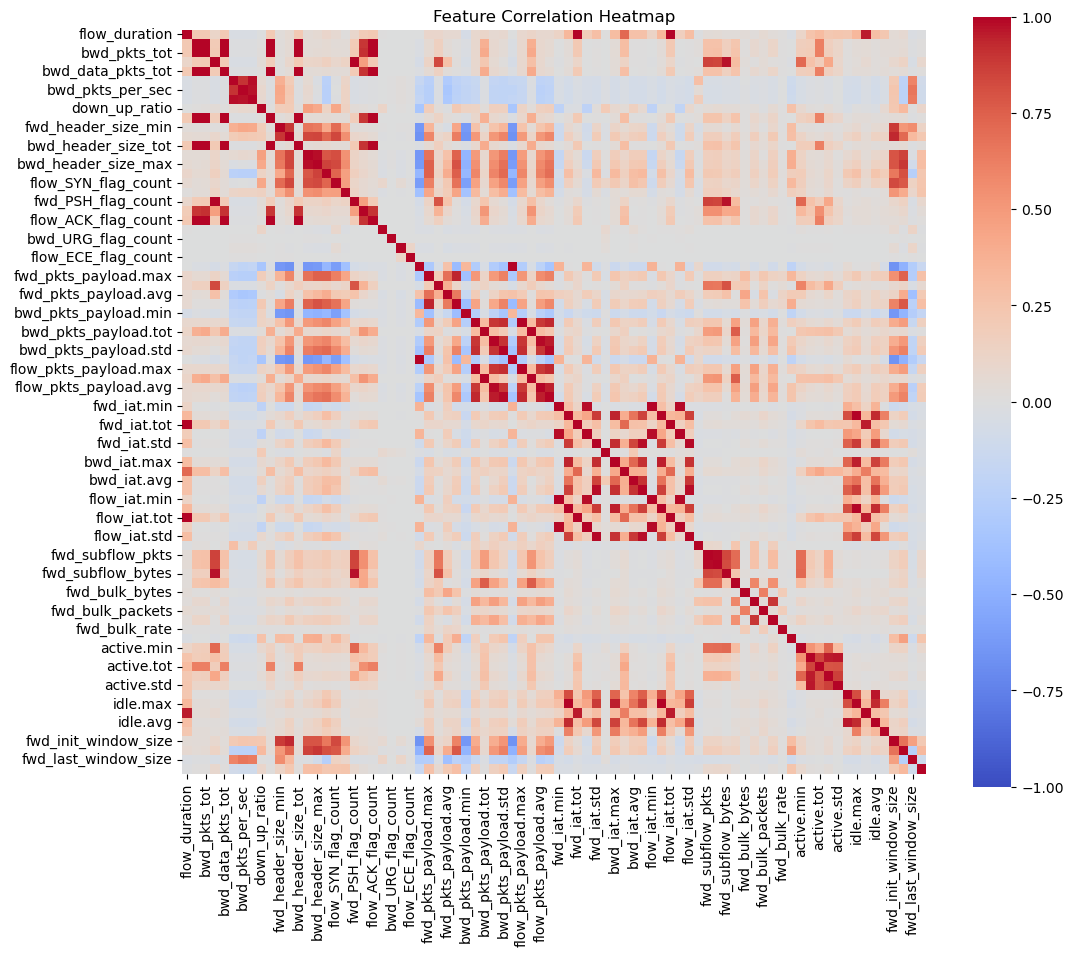

In [10]:
import seaborn as sns
import numpy as np
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", vmax=1.0, vmin=-1.0, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


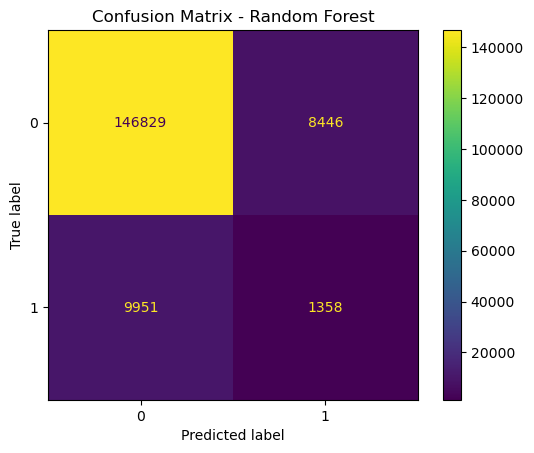

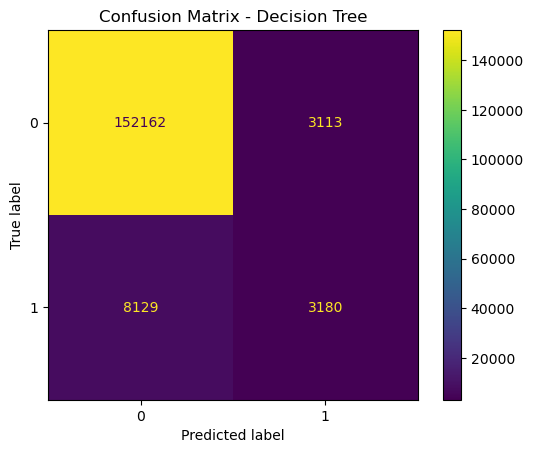

C:\Users\shrut\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


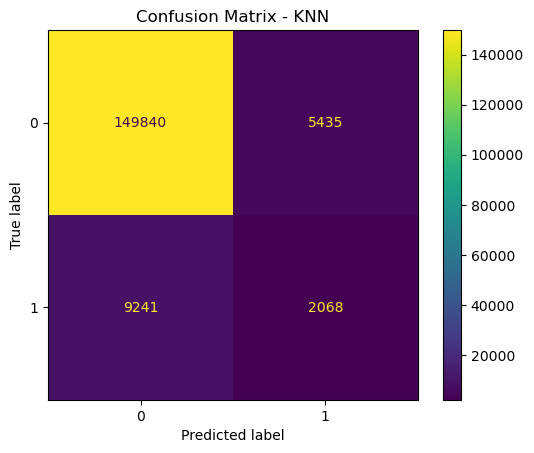

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# KNN Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test)
plt.title("Confusion Matrix - KNN")
plt.show()


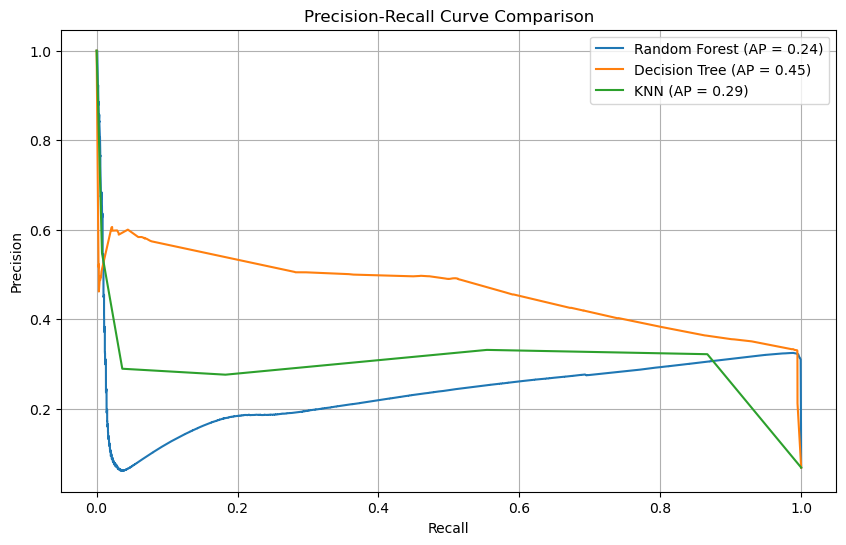

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curves(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 6))

    for model, name in zip(models, model_names):
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.predict(X_test)

        precision, recall, _ = precision_recall_curve(y_test, y_score)
        ap_score = average_precision_score(y_test, y_score)

        plt.plot(recall, precision, label=f"{name} (AP = {ap_score:.2f})")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve Comparison")
    plt.legend(loc="upper right")
    plt.grid()
    plt.show()

# ✅ Use correct model variable names
models = [rf_model, dt_model, knn_model]
model_names = ["Random Forest", "Decision Tree", "KNN"]

# Plot precision-recall curves
plot_precision_recall_curves(models, model_names, X_test, y_test)


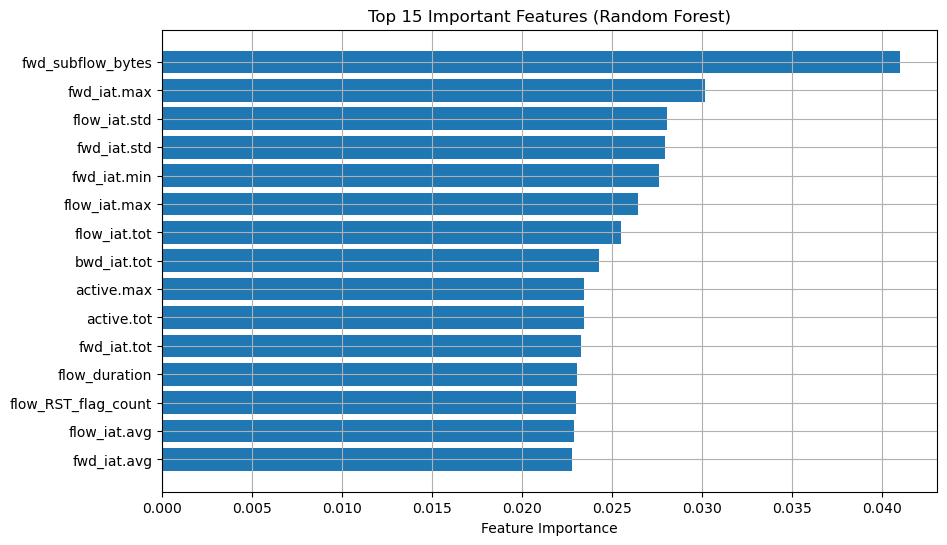

In [13]:
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-15:]  # Top 15 features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features (Random Forest)")
plt.grid()
plt.show()


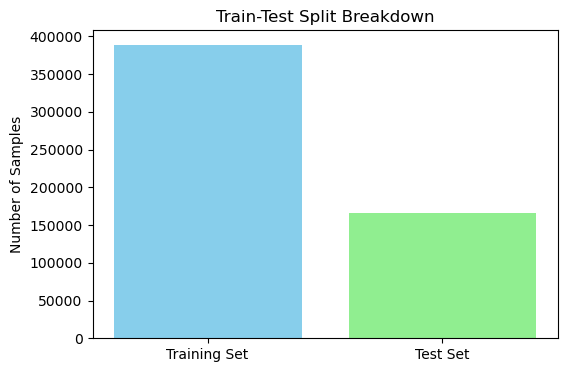

In [14]:
sizes = [len(X_train), len(X_test)]
labels = ['Training Set', 'Test Set']
plt.figure(figsize=(6,4))
plt.bar(labels, sizes, color=['skyblue', 'lightgreen'])
plt.title("Train-Test Split Breakdown")
plt.ylabel("Number of Samples")
plt.show()


<Figure size 1000x600 with 0 Axes>

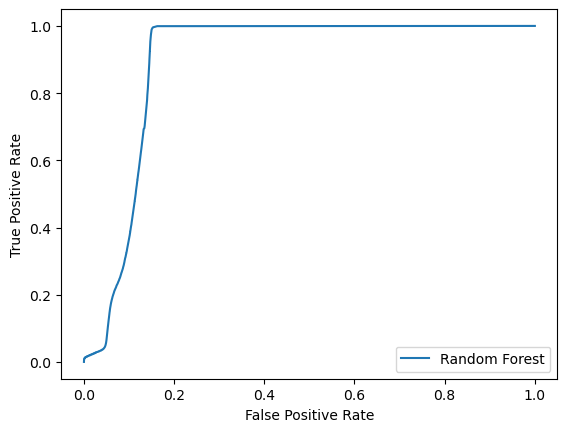

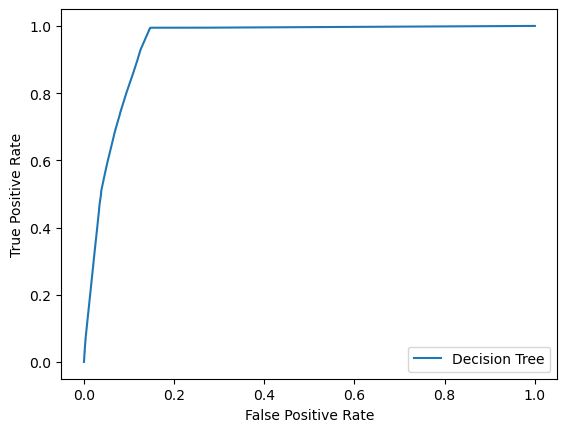

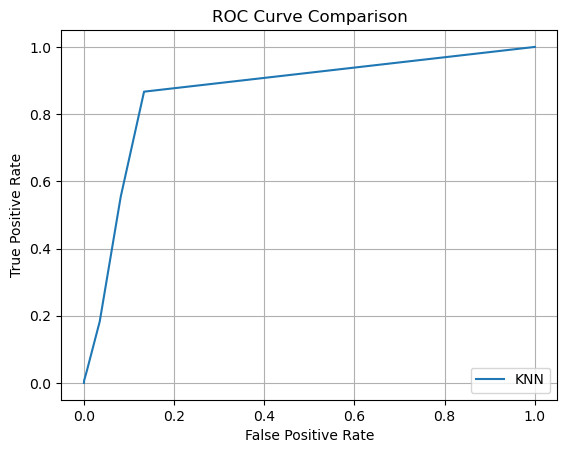

In [18]:
from sklearn.metrics import roc_curve, RocCurveDisplay

plt.figure(figsize=(10, 6))
for model, name in zip(models, model_names):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.predict(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=name).plot()

plt.title("ROC Curve Comparison")
plt.grid()
plt.show()
